In [84]:
# 1. Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [59]:
# 2. Excecute path

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
data_soup = soup(html, 'html.parser')

In [60]:
# 3. Scrape data with Splinter and Beautiful Soup
table = data_soup.find_all('tr', class_='data-row')

list_of_rows = []
for row in table:
    td = row.find('td')
    row = [col.text for col in td]
    list_of_rows.append(row)
print(list_of_rows)

[['2'], ['13'], ['24'], ['35'], ['46'], ['57'], ['68'], ['79'], ['112'], ['114'], ['123'], ['134'], ['145'], ['156'], ['163'], ['170'], ['171'], ['172'], ['173'], ['175'], ['176'], ['177'], ['178'], ['179'], ['180'], ['181'], ['182'], ['183'], ['184'], ['185'], ['186'], ['187'], ['188'], ['189'], ['190'], ['191'], ['192'], ['193'], ['194'], ['195'], ['196'], ['197'], ['198'], ['199'], ['200'], ['201'], ['202'], ['203'], ['204'], ['205'], ['206'], ['207'], ['208'], ['209'], ['210'], ['211'], ['212'], ['213'], ['214'], ['215'], ['216'], ['217'], ['218'], ['219'], ['220'], ['221'], ['222'], ['223'], ['224'], ['225'], ['226'], ['227'], ['228'], ['229'], ['230'], ['231'], ['233'], ['234'], ['235'], ['236'], ['237'], ['238'], ['239'], ['240'], ['241'], ['242'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11'], ['12'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['20'], ['21'], ['22'], ['23'], ['25'], ['26'], ['27'], ['28'], ['29'], ['30'], ['31'], ['32'], ['33'], ['34'], [

In [94]:
# Scrape data using Pandas
mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [95]:
# 4. Assemble the scraped data into a Pandas DataFrame
mars_data_df = mars_df[0]
mars_data_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [96]:
# 5. Examine the data types
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [97]:
# Convert the data
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['terrestrial_date']

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]

In [98]:
# Check data types
mars_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [99]:
# 6. How many months exist on Mars?
mars_data_df['month'].max()

12

In [100]:
# 7. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_data_df['sol'].count()

1867

In [101]:
# 8. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
avg_temp = mars_data_df.groupby('month').mean()[['min_temp']]
avg_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


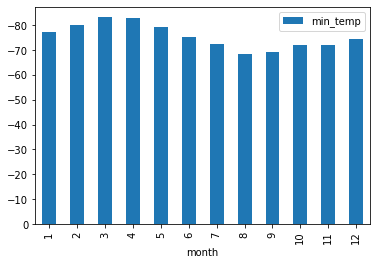

In [102]:
 # Plot the results
avg_temp.plot.bar(y="min_temp")
plt.gca().invert_yaxis()

In [103]:
# 9. Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
avg_pr = mars_data_df.groupby('month').mean()[['pressure']]
avg_pr

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<AxesSubplot:xlabel='month'>

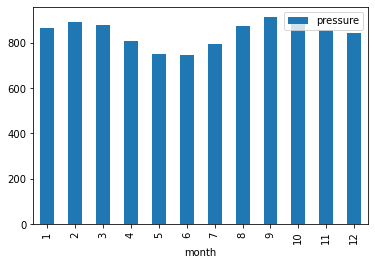

In [104]:
# Plot the results
avg_pr.plot.bar(y="pressure")

In [ ]:
# 10. About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 


In [ ]:
# Visually estimate the result by plotting the daily minimum temperature.

In [ ]:
# 11. Export the DataFrame to a CSV file.


In [97]:
browser.quit()